<center><h1>Numpy Advanced</center></h1>

### Numpy array vs Python lists

In [ ]:
#  speed
# list

import time
a = [x for x in range(10000000)]
b = [x for x in range(10000000,20000000)]

start_time = time.time()
c = []
for i in range(len(a)):
    c.append(a[i]+b[i])
print(time.time() - start_time)

8.111140251159668


In [8]:
# numpy arrays
import numpy as np

a = np.arange(10000000)
b = np.arange(10000000,20000000)

start_time = time.time()
c = a + b
print(time.time() - start_time)

0.2790050506591797


In [9]:
print(f"Numpy array is how many times faster than list {5.208878993988037 / 0.04199838638305664}")

Numpy array is how many times faster than list 124.02569342734199


In [10]:
# memory usage

import sys
a = [x for x in range(10000000)]

sys.getsizeof(a)

89095160

In [11]:
a = np.arange(10000000)

sys.getsizeof(a)

40000112

In [ ]:
a = np.arange(10000000,dtype=np.int8)

sys.getsizeof(a)

[  0   1   2 ... 125 126 127]


10000112

Good question! You're absolutely right—**a single number like `10,000,000` (ten million) cannot be stored in 8 bits** because an `int8` (8-bit integer) can only store values between **-128 to 127**.  

So, let’s clarify **what’s actually happening** in your code:

---

### **Understanding Your Code**
```python
import numpy as np
import sys

a = np.arange(10000000, dtype=np.int8)
print(sys.getsizeof(a))
```
- `np.arange(10000000, dtype=np.int8)` generates a sequence of numbers from `0` to `9,999,999`, but **each number is forced into 8-bit storage**.
- An `int8` can only store values from **-128 to 127**, so when values exceed 127, **they wrap around due to integer overflow**.

---

### **Key Issue: Integer Overflow**
Since `int8` is an **8-bit signed integer**, it can **only represent numbers from -128 to 127**. When we try to store numbers beyond this range, they wrap around using **modulo 256 arithmetic**.

#### **How Overflow Works**
Let’s look at a small example:
```python
import numpy as np

a = np.arange(260, dtype=np.int8)
print(a)
```
#### **Expected Output (Wrapping Around Every 256)**
```
[  0   1   2 ... 125 126 127 -128 -127 -126 ... -2 -1   0   1   2 ...]
```
- When `127` is reached, the next number **overflows** and becomes `-128`, then `-127`, `-126`, ..., `0`, and the cycle repeats.

---

### **What Happens in Your Case?**
For `np.arange(10000000, dtype=np.int8)`, the numbers **cycle every 256 numbers** because `int8` overflows:
```
[0, 1, 2, ..., 127, -128, -127, ..., -1, 0, 1, 2, ..., 127, -128, -127, ...]
```
So instead of storing actual values from `0` to `9,999,999`, NumPy **repeats values within the range of `-128 to 127`**.

---

### **How to Fix This?**
If you actually want to store numbers from `0` to `10,000,000`, you need a **larger data type**:

#### **Using `int32` (32-bit integer)**
```python
a = np.arange(10000000, dtype=np.int32)
print(a[-1])  # Correctly prints: 9999999
```
- `int32` supports numbers from **-2,147,483,648 to 2,147,483,647**, so it can store `10,000,000` properly.

#### **Using `int64` (64-bit integer)**
```python
a = np.arange(10000000, dtype=np.int64)
print(a[-1])  # Correctly prints: 9999999
```
- `int64` is overkill here, but it supports extremely large numbers.

---

### **Summary**
✅ **Why `int8` doesn't work?**
- `int8` can only store values **between -128 and 127**.
- Any number beyond `127` **overflows** and wraps around using modulo 256.

✅ **How to store `10,000,000` correctly?**
- Use **`np.int32`** or **`np.int64`**, not `np.int8`.

---

This is an **important concept in numerical computing**: **choosing the right data type is crucial** for correct computations! 🚀

In [ ]:
# convenience

Here are **detailed and complete notes** on **NumPy arrays vs Python lists**, covering speed, memory, convenience, and more.

---

# **NumPy Arrays vs Python Lists**  
Python provides **lists** as a built-in data structure, while **NumPy arrays** (ndarrays) are provided by the `numpy` package for high-performance numerical computing. Let’s compare them in terms of **speed, memory usage, and convenience**.

---

## **1. Speed: NumPy Array vs Python List**
### **Why are NumPy arrays faster?**
NumPy arrays are significantly faster than Python lists due to the following reasons:
1. **NumPy is implemented in C**  
   - NumPy operations are executed in compiled C code, while Python lists operate through an interpreted language (Python), making them slower.
   
2. **Homogeneous Data Type**  
   - Python lists are **heterogeneous** (can store different data types), so Python must store extra metadata for each element. NumPy arrays store data **homogeneously**, making access and computation faster.

3. **Efficient Memory Storage (Contiguous Memory Allocation)**  
   - NumPy arrays store elements in **contiguous memory blocks**, meaning fewer CPU cache misses and improved speed.  
   - Python lists store references to objects, leading to inefficient memory access.

4. **Vectorization with SIMD (Single Instruction Multiple Data)**  
   - NumPy uses **vectorized operations** and **SIMD** (CPU executes the same operation on multiple data points in parallel). Python lists rely on **loop-based operations**, which are slower.

5. **Avoids Python Overhead (GIL - Global Interpreter Lock)**  
   - NumPy bypasses the Python interpreter's overhead and executes operations in parallel using low-level optimized C libraries.

### **Speed Benchmark**
Let's compare the speed of NumPy arrays vs Python lists:

```python
import numpy as np
import time

# Python list computation
size = 10**6
L1 = list(range(size))
L2 = list(range(size))

start = time.time()
result = [L1[i] + L2[i] for i in range(size)]
end = time.time()
print("Python List Time:", end - start)

# NumPy array computation
A1 = np.arange(size)
A2 = np.arange(size)

start = time.time()
result = A1 + A2  # Vectorized operation
end = time.time()
print("NumPy Array Time:", end - start)
```

#### **Expected Output**
```
Python List Time: 0.25 sec
NumPy Array Time: 0.002 sec
```
🚀 **NumPy is ~100x faster than Python lists!**

---

## **2. Memory Usage: NumPy Array vs Python List**
NumPy arrays consume significantly **less memory** than Python lists.

### **Why do NumPy arrays use less memory?**
1. **Fixed Data Type**  
   - NumPy arrays use a **fixed** data type (`int32`, `float64`, etc.), which means **no extra memory** is wasted.
   - Python lists store **pointers** to objects, which increases memory usage.

2. **Contiguous Memory Allocation**  
   - NumPy arrays are stored in a **single contiguous block of memory**.
   - Python lists store elements in separate memory locations with extra metadata, leading to more memory consumption.

### **Memory Benchmark**
Let's compare the memory usage of a Python list and a NumPy array:

```python
import sys

size = 10**6  # 1 million elements

# Python list memory usage
L = [i for i in range(size)]
print("Python List Memory:", sys.getsizeof(L), "bytes")

# NumPy array memory usage
A = np.arange(size, dtype=np.int32)
print("NumPy Array Memory:", A.nbytes, "bytes")
```

#### **Expected Output**
```
Python List Memory: 8,000,000 bytes
NumPy Array Memory: 4,000,000 bytes
```
✅ **NumPy uses ~50% less memory than Python lists!**

---

## **3. Convenience: NumPy Array vs Python List**
NumPy provides many **built-in functions** that make operations easier, reducing the need for loops.

### **1. Mathematical Operations**
#### **Python List**
```python
L1 = [1, 2, 3, 4]
L2 = [5, 6, 7, 8]
result = [L1[i] + L2[i] for i in range(len(L1))]  # Manual loop
print(result)
```
#### **NumPy Array**
```python
A1 = np.array([1, 2, 3, 4])
A2 = np.array([5, 6, 7, 8])
result = A1 + A2  # Vectorized addition
print(result)
```
✅ **NumPy is more readable and concise!**

---

### **2. Broadcasting**
NumPy supports **broadcasting**, meaning operations work on different-sized arrays **without explicit looping**.

#### **Python List (Requires Loop)**
```python
L = [1, 2, 3, 4]
scalar = 2
result = [i * scalar for i in L]  # Must use loop
print(result)
```
#### **NumPy Array (Uses Broadcasting)**
```python
A = np.array([1, 2, 3, 4])
scalar = 2
result = A * scalar  # Broadcasting
print(result)
```
✅ **NumPy removes the need for explicit loops!**

---

### **3. Indexing & Slicing**
NumPy provides **advanced slicing** capabilities.

#### **Python List**
```python
L = [1, 2, 3, 4, 5, 6]
print(L[1:4])  # Slicing works, but limited functionality
```
#### **NumPy Array**
```python
A = np.array([1, 2, 3, 4, 5, 6])
print(A[1:4])  # Same as list
print(A[::2])  # Skip elements
print(A[::-1])  # Reverse the array
```
✅ **NumPy provides more powerful slicing!**

---

### **4. Multidimensional Arrays**
Python lists require **nested lists** for multi-dimensional data, while NumPy provides **built-in support**.

#### **Python Nested List**
```python
L = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
print(L[1][2])  # Accessing row 1, column 2
```
#### **NumPy Multi-Dimensional Array**
```python
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(A[1, 2])  # Accessing row 1, column 2
```
✅ **NumPy makes multidimensional indexing easier!**

---

## **Summary: NumPy Arrays vs Python Lists**
| Feature | Python List | NumPy Array |
|---------|------------|-------------|
| **Speed** | Slow (Loop-based) | Fast (Vectorized, C-based) 🚀 |
| **Memory Usage** | High (Stores pointers) | Low (Fixed data type) 📉 |
| **Mathematical Operations** | Manual looping required | Direct operations supported ✅ |
| **Indexing & Slicing** | Limited | Advanced slicing ✅ |
| **Broadcasting** | Not supported | Supported (No explicit loops) ✅ |
| **Multi-dimensional** | Nested lists required | Built-in support ✅ |

---

## **Final Verdict: When to Use NumPy?**
✅ **Use NumPy if:**  
- You are working with **large datasets**  
- You need **fast numerical computations**  
- You are doing **data science, machine learning, or deep learning**  
- You need **vectorized operations**  

❌ **Use Python lists if:**  
- You have **small datasets**  
- You need **heterogeneous elements (e.g., strings, numbers, objects)**  

---
### **Conclusion**
NumPy arrays are **faster, memory-efficient, and more convenient** than Python lists for numerical computing. 🚀  
This is why **NumPy is the foundation of Python-based data science and machine learning!**

### Advanced Indexing

In [13]:
# Normal Indexing and slicing

a = np.arange(24).reshape(6,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23]])

In [14]:
a[1:3,1:3]

array([[ 5,  6],
       [ 9, 10]])

In [15]:
# Fancy Indexing

a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23]])

In [16]:
a[[0,2,3]]

array([[ 0,  1,  2,  3],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [17]:
a[[0,2,3,5]]

array([[ 0,  1,  2,  3],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [20, 21, 22, 23]])

In [18]:
# 1st column 3rd column 
a[:,[0,2,3]]

array([[ 0,  2,  3],
       [ 4,  6,  7],
       [ 8, 10, 11],
       [12, 14, 15],
       [16, 18, 19],
       [20, 22, 23]])

Here are **detailed and complete notes** on **Fancy Indexing in NumPy**, covering every essential concept, use case, and advanced technique so that nothing is left to learn.

---

# **Fancy Indexing in NumPy**
### **Introduction**
Fancy indexing in NumPy allows accessing elements of an array using **lists, arrays, or boolean masks** instead of traditional slicing (`:`). It provides a powerful way to extract, modify, or manipulate elements efficiently.

✅ **Key Benefits:**
- Enables **random access** to multiple elements at once  
- **Faster** and **more memory-efficient** than loops  
- Supports **boolean masking** and **integer arrays** for complex selections  

---

# **1. Fancy Indexing with Integer Arrays**
You can **select multiple elements** using a list or array of indices.

### **Example 1: Selecting Elements Using a List**
```python
import numpy as np

arr = np.array([10, 20, 30, 40, 50])
indices = [0, 2, 4]  # Selecting indices 0, 2, and 4

result = arr[indices]
print(result)  # Output: [10 30 50]
```
✅ **NumPy directly retrieves the specified indices without using loops.**  

### **Example 2: Using a NumPy Array for Indexing**
```python
indices = np.array([1, 3, 4])
result = arr[indices]
print(result)  # Output: [20 40 50]
```

---

# **2. Fancy Indexing in 2D Arrays**
Fancy indexing works for **multidimensional arrays** too.

### **Example 3: Selecting Rows**
```python
matrix = np.array([[10, 20, 30],
                   [40, 50, 60],
                   [70, 80, 90]])

row_indices = [0, 2]  # Selecting first and third row
result = matrix[row_indices]
print(result)

# Output:
# [[10 20 30]
#  [70 80 90]]
```
✅ **The result is a subset of the original matrix with only the selected rows.**

### **Example 4: Selecting Specific Elements from Different Rows**
You can use **two separate lists** to select specific elements across multiple dimensions.

```python
row_indices = [0, 1, 2]   # Row indices
col_indices = [2, 1, 0]   # Column indices

result = matrix[row_indices, col_indices]
print(result)  # Output: [30 50 70]
```
✅ **Each `(row, col)` pair extracts a specific element:**
- `(0,2) → 30`
- `(1,1) → 50`
- `(2,0) → 70`

---

# **3. Fancy Indexing with Boolean Masking**
Instead of specifying exact indices, you can use **Boolean conditions** to extract elements.

### **Example 5: Selecting Elements That Match a Condition**
```python
arr = np.array([10, 20, 30, 40, 50])

mask = arr > 25  # Creates a boolean mask: [False False True True True]
result = arr[mask]
print(result)  # Output: [30 40 50]
```
✅ **Boolean masks select elements where the condition is `True`.**

### **Example 6: Filtering a 2D Array**
```python
matrix = np.array([[10, 20, 30],
                   [40, 50, 60],
                   [70, 80, 90]])

mask = matrix > 50
print(matrix[mask])  # Output: [60 70 80 90]
```
✅ **Extracts all values greater than `50`.**

---

# **4. Combining Fancy Indexing with Slicing**
You can **combine fancy indexing with slicing** for more complex selections.

### **Example 7: Mixing Fancy Indexing & Slicing**
```python
matrix = np.array([[10, 20, 30, 40],
                   [50, 60, 70, 80],
                   [90, 100, 110, 120]])

result = matrix[:, [1, 3]]  # Select all rows, but only columns 1 & 3
print(result)

# Output:
# [[ 20  40]
#  [ 60  80]
#  [100 120]]
```
✅ **Extracts only columns `1` and `3` from all rows.**

---

# **5. Using Fancy Indexing to Modify Arrays**
Fancy indexing can also be used to **modify** selected elements.

### **Example 8: Changing Values Using Fancy Indexing**
```python
arr = np.array([10, 20, 30, 40, 50])

indices = [1, 3]  # Modify index 1 and 3
arr[indices] = [200, 400]
print(arr)  # Output: [ 10 200  30 400  50]
```
✅ **Modifies only the selected elements.**

### **Example 9: Conditional Modification**
```python
arr = np.array([10, 20, 30, 40, 50])

arr[arr > 25] = 0  # Set elements >25 to 0
print(arr)  # Output: [10 20  0  0  0]
```
✅ **All elements greater than `25` are replaced with `0`.**

---

# **6. Selecting Elements Using Multiple Conditions**
NumPy allows **combining multiple conditions** using logical operators.

### **Example 10: Using Multiple Conditions**
```python
arr = np.array([10, 20, 30, 40, 50])

result = arr[(arr > 15) & (arr < 45)]  # Elements between 15 and 45
print(result)  # Output: [20 30 40]
```
✅ **Only elements between `15` and `45` are selected.**

### **Example 11: Using OR Condition**
```python
result = arr[(arr < 20) | (arr > 40)]
print(result)  # Output: [10 50]
```
✅ **Selects elements that are either `< 20` OR `> 40`.**

---

# **7. Avoiding Pitfalls in Fancy Indexing**
There are some caveats when using fancy indexing.

### **1. Fancy Indexing Returns a Copy, Not a View**
Unlike slicing (`:`), fancy indexing **returns a copy, not a view**, meaning changes won't affect the original array.

#### **Example 12: Fancy Indexing Returns a Copy**
```python
arr = np.array([1, 2, 3, 4])
subset = arr[[0, 2]]
subset[0] = 100

print(arr)    # Output: [1 2 3 4]  (Original remains unchanged)
print(subset) # Output: [100 3]    (Only the copy is modified)
```
✅ **Use slicing if you need a view instead of a copy.**

---

# **Summary Table: Fancy Indexing Techniques**
| **Technique** | **Example** | **Description** |
|--------------|------------|----------------|
| Integer Array Indexing | `arr[[1, 3, 4]]` | Selects specific elements |
| Boolean Masking | `arr[arr > 20]` | Selects elements matching condition |
| Multi-Dimensional Indexing | `matrix[[0, 2], [1, 3]]` | Selects specific elements from 2D arrays |
| Combining Fancy & Slicing | `matrix[:, [1, 3]]` | Selects specific columns from all rows |
| Modifying Values | `arr[[0, 2]] = [100, 200]` | Changes specific elements |
| Logical Conditions | `arr[(arr > 10) & (arr < 50)]` | Filters elements with multiple conditions |

---

# **Conclusion**
Fancy indexing in NumPy is an **efficient and flexible** way to **access, modify, and filter data** using integer arrays and boolean masks. It eliminates the need for explicit loops, making operations **faster and more concise**.

🚀 **Mastering fancy indexing will make your NumPy skills more powerful for data science, AI, and numerical computing!**

### Boolean Indexing

condition based indexing is called boolean indexing

In [24]:
a = np.random.randint(1,100,24).reshape(6,4)
a

array([[95, 46, 67, 82],
       [83, 24, 37, 18],
       [82, 66, 76, 42],
       [92, 54, 68, 26],
       [82, 19, 81, 16],
       [12, 35, 10, 45]])

In [28]:
# find all numbers greater than 50

print(a > 50) # => this array is called boolean array 

a[a > 50]

[[ True False  True  True]
 [ True False False False]
 [ True  True  True False]
 [ True  True  True False]
 [ True False  True False]
 [False False False False]]


array([95, 67, 82, 83, 82, 66, 76, 92, 54, 68, 82, 81])

The best part about it is that you can use this array as a boolean mask and using it use can do filtering.

What are you gonna do is that you take this mask array on top of original array and where there is true you take those items

In [27]:
a[a > 50]

array([95, 67, 82, 83, 82, 66, 76, 92, 54, 68, 82, 81])

In [29]:
# find out even number

a [a % 2 == 0]

array([46, 82, 24, 18, 82, 66, 76, 42, 92, 54, 68, 26, 82, 16, 12, 10])

In [32]:
# find all number greater than 50 and are even

print(a[ (a % 2 == 0) & (a > 50) ])

[82 82 66 76 92 54 68 82]


In [33]:
# find all numbers not divisible by 7

a[ a % 7 != 0]

array([95, 46, 67, 82, 83, 24, 37, 18, 82, 66, 76, 92, 54, 68, 26, 82, 19,
       81, 16, 12, 10, 45])

In [34]:
a[ ~(a % 7 == 0) ]

array([95, 46, 67, 82, 83, 24, 37, 18, 82, 66, 76, 92, 54, 68, 26, 82, 19,
       81, 16, 12, 10, 45])

Here's a **detailed and complete note** on **Boolean Indexing in NumPy**, ensuring that nothing is left out, along with some questions to test understanding.

---

# **Boolean Indexing in NumPy**
## **1. Introduction**
Boolean Indexing in NumPy is a technique for selecting elements from an array based on **True/False conditions**. It allows us to filter data without using explicit loops.

### **Key Benefits:**
✅ Extract elements that satisfy a condition  
✅ Modify values that match specific criteria  
✅ Perform complex filtering using logical operators (`&`, `|`, `~`)  
✅ Faster than using traditional loops  

---

## **2. Boolean Masking Basics**
A **boolean mask** is an array of `True` and `False` values that determines which elements should be selected.

### **Example 1: Creating a Boolean Mask**
```python
import numpy as np

arr = np.array([10, 20, 30, 40, 50])
mask = arr > 25  # Condition creates a boolean array
print(mask)
```
🔹 **Output:**
```
[False False  True  True  True]
```
✅ **The mask is `True` where `arr > 25` and `False` otherwise.**

---

## **3. Using Boolean Masks to Index Arrays**
We can use the mask directly to **filter** elements.

### **Example 2: Applying Boolean Indexing**
```python
result = arr[arr > 25]  # Select only elements greater than 25
print(result)
```
🔹 **Output:**
```
[30 40 50]
```
✅ **Only elements that match `True` in the mask are returned.**

---

## **4. Boolean Indexing on 2D Arrays**
Boolean indexing also works with **multidimensional arrays**.

### **Example 3: Filtering a 2D Array**
```python
matrix = np.array([[10, 20, 30],
                   [40, 50, 60],
                   [70, 80, 90]])

mask = matrix > 50  # Boolean mask
print(matrix[mask])  # Selecting elements greater than 50
```
🔹 **Output:**
```
[60 70 80 90]
```
✅ **Flattens the selected elements into a 1D array.**

---

## **5. Applying Multiple Conditions**
We can combine conditions using logical operators.

### **Logical Operators in NumPy**
| **Operator** | **Meaning** | **Example** |
|-------------|------------|------------|
| `&` (AND) | Both conditions must be `True` | `arr[(arr > 10) & (arr < 40)]` |
| `|` (OR)  | At least one condition must be `True` | `arr[(arr < 20) | (arr > 40)]` |
| `~` (NOT) | Inverts the condition | `arr[~(arr > 30)]` |

### **Example 4: Using AND (`&`)**
```python
result = arr[(arr > 10) & (arr < 40)]
print(result)
```
🔹 **Output:**
```
[20 30]
```
✅ **Selects elements between 10 and 40.**

### **Example 5: Using OR (`|`)**
```python
result = arr[(arr < 20) | (arr > 40)]
print(result)
```
🔹 **Output:**
```
[10 50]
```
✅ **Selects elements that are either `<20` OR `>40`.**

### **Example 6: Using NOT (`~`)**
```python
result = arr[~(arr > 30)]
print(result)
```
🔹 **Output:**
```
[10 20 30]
```
✅ **Selects elements that are NOT greater than 30.**

---

## **6. Modifying Elements Using Boolean Indexing**
Boolean masks can also be used to **modify** elements.

### **Example 7: Changing Values That Match a Condition**
```python
arr[arr > 30] = 0  # Set all elements greater than 30 to 0
print(arr)
```
🔹 **Output:**
```
[10 20 30  0  0]
```
✅ **Replaces elements `>30` with `0`.**

---

## **7. Complex Conditions on 2D Arrays**
### **Example 8: Filtering Specific Rows**
```python
matrix = np.array([[10, 20, 30],
                   [40, 50, 60],
                   [70, 80, 90]])

mask = matrix[:, 1] > 30  # Select rows where column 1 > 30
result = matrix[mask]
print(result)
```
🔹 **Output:**
```
[[40 50 60]
 [70 80 90]]
```
✅ **Selects rows where the middle column is greater than 30.**

---

## **8. Avoiding Common Mistakes**
### **1️⃣ Using `and` / `or` Instead of `&` / `|`**
🚨 **Incorrect:**
```python
arr[(arr > 10) and (arr < 40)]  # Raises an error
```
✅ **Correct:**
```python
arr[(arr > 10) & (arr < 40)]
```

### **2️⃣ Using Boolean Indexing on Empty Arrays**
🚨 **Incorrect:**
```python
empty = np.array([])
print(empty[empty > 5])  # No output, but doesn't raise an error
```
✅ **Correct:**
If the result is an empty array, it means no values satisfied the condition.

---

## **9. Questions to Test Your Understanding**
### **Q1: What will be the output of the following?**
```python
arr = np.array([5, 15, 25, 35, 45])
print(arr[arr % 2 == 0])
```
A) `[15 35 45]`  
B) `[25]`  
C) `[]`  
D) `[5 15 25 35 45]`

➡ **Answer:** `C) []`  
🔹 **Explanation:** There are no even numbers in `arr`, so an empty array is returned.

---

### **Q2: What will this code output?**
```python
matrix = np.array([[2, 4, 6],
                   [8, 10, 12],
                   [14, 16, 18]])

print(matrix[matrix % 4 == 0])
```
A) `[2 6 8 10 12 14 16 18]`  
B) `[4 8 12 16]`  
C) `[4 8 12 16]`  
D) `[4 8 12 16]`  

➡ **Answer:** `D) [4 8 12 16]`  
🔹 **Explanation:** Only elements divisible by 4 are selected.

---

### **Q3: What will be the output of the following?**
```python
arr = np.array([10, 20, 30, 40, 50])
arr[arr > 25] = -1
print(arr)
```
A) `[10 20 -1 -1 -1]`  
B) `[10 20 30 40 50]`  
C) `[10 20 30 -1 -1]`  
D) `[10 20 30 40 -1]`

➡ **Answer:** `A) [10 20 -1 -1 -1]`  
🔹 **Explanation:** Values greater than `25` are replaced with `-1`.

---

## **10. Summary Table: Boolean Indexing Techniques**
| **Operation** | **Example** | **Description** |
|--------------|------------|----------------|
| Basic Filtering | `arr[arr > 10]` | Selects values greater than 10 |
| Multiple Conditions | `arr[(arr > 10) & (arr < 40)]` | Selects values in range 10-40 |
| OR Condition | `arr[(arr < 20) | (arr > 40)]` | Selects values `< 20` OR `> 40` |
| NOT Condition | `arr[~(arr > 30)]` | Selects values NOT `> 30` |
| Modifying Values | `arr[arr > 30] = 0` | Replaces values `> 30` with `0` |

---

## **Final Thoughts**
🚀 **Boolean Indexing in NumPy is an essential skill for data analysis, machine learning, and AI.**  
✅ **Mastering it will make data manipulation faster and more efficient!**

### Broadcasting

The term broadcasting describes how NumPy treats arrays with different shapes during arithmetic operations.

The smaller array is “broadcast” across the larger array so that they have compatible shapes.

In [ ]:
# why broadcasting is needed ? below code show that

In [39]:
# same shape

a = np.arange(6).reshape(2,3)
b = np.arange(6,12).reshape(2,3)

print(a)
print("*"*50)
print(b)
print("*"*50)
print(a+b)

[[0 1 2]
 [3 4 5]]
**************************************************
[[ 6  7  8]
 [ 9 10 11]]
**************************************************
[[ 6  8 10]
 [12 14 16]]


In [40]:
# diff shape
a = np.arange(6).reshape(2,3)
b = np.arange(6,9).reshape(1,3)

print(a)
print("*"*50)
print(b)
print("*"*50)
print(a+b)

[[0 1 2]
 [3 4 5]]
**************************************************
[[6 7 8]]
**************************************************
[[ 6  8 10]
 [ 9 11 13]]


#### Broadcasting Rules

**1. Make the two arrays have the same number of dimensions.**<br>
- If the numbers of dimensions of the two arrays are different, add new dimensions with size 1 to the head of the array with the smaller dimension.<br>  
    


---
If we have a array of (3,2) => 2d and (3,) => 1D then (3,) will transform into the (1,3) 

---
If we have a array of (3,3,3) => 3d and (3,) => 1D then (3,) will transform into (1,1,3) and if we have (3,2) then the broadcasting cannot be performed

**2. Make each dimension of the two arrays the same size.**<br>
- If the sizes of each dimension of the two arrays do not match, dimensions with size 1 are stretched to the size of the other array.
- If there is a dimension whose size is not 1 in either of the two arrays, it cannot be broadcasted, and an error is raised.  
<img src = "https://jakevdp.github.io/PythonDataScienceHandbook/figures/02.05-broadcasting.png">

---  
So now we got a new array of (1,1,3) dimensions. Now these 1 are strected to the size of the other array.

In [42]:
# More example

a = np.arange(12).reshape(4,3)
b = np.arange(3)

print(a)
print("*"*50)
print(b)
print("*"*50)
print(a+b)

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
**************************************************
[0 1 2]
**************************************************
[[ 0  2  4]
 [ 3  5  7]
 [ 6  8 10]
 [ 9 11 13]]


In [ ]:
a = np.arange(12).reshape(3,4)
b = np.arange(3)

print(a)
print("*"*50)
print(b)
print("*"*50)
print(a+b)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
**************************************************
[0 1 2]
**************************************************


ValueError: operands could not be broadcast together with shapes (3,4) (3,) 

In [45]:
a = np.arange(3).reshape(1,3)
b = np.arange(3).reshape(3,1)

print(a)
print("*"*50)
print(b)
print("*"*50)
print(a+b)

[[0 1 2]]
**************************************************
[[0]
 [1]
 [2]]
**************************************************
[[0 1 2]
 [1 2 3]
 [2 3 4]]


In [46]:
a = np.arange(3).reshape(1,3)
b = np.arange(4).reshape(4,1)

print(a)
print("*"*50)
print(b)
print("*"*50)
print(a+b)

[[0 1 2]]
**************************************************
[[0]
 [1]
 [2]
 [3]]
**************************************************
[[0 1 2]
 [1 2 3]
 [2 3 4]
 [3 4 5]]


In [47]:
a = np.array([1])
# shape -> (1,1)
b = np.arange(4).reshape(2,2)
# shape -> (2,2)

print(a)
print("*"*50)
print(b)
print("*"*50)
print(a+b)

[1]
**************************************************
[[0 1]
 [2 3]]
**************************************************
[[1 2]
 [3 4]]


In [48]:
a = np.arange(12).reshape(3,4)
b = np.arange(12).reshape(4,3)

print(a)
print("*"*50)
print(b)
print("*"*50)
print(a+b)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
**************************************************
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
**************************************************


ValueError: operands could not be broadcast together with shapes (3,4) (4,3) 

In [49]:
a = np.arange(16).reshape(4,4)
b = np.arange(4).reshape(2,2)

print(a)
print("*"*50)
print(b)
print("*"*50)
print(a+b)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
**************************************************
[[0 1]
 [2 3]]
**************************************************


ValueError: operands could not be broadcast together with shapes (4,4) (2,2) 

Here is a **detailed and complete note** on **Broadcasting in NumPy**, ensuring that **nothing is left out** on this topic.

---

# **Broadcasting in NumPy**
## **1. Introduction**
Broadcasting is a powerful **vectorized operation** in NumPy that allows arithmetic operations on arrays of different shapes **without explicit looping**.

### **Why Broadcasting?**
✅ Eliminates the need for loops  
✅ Increases computational efficiency  
✅ Simplifies operations on multi-dimensional arrays  
✅ Optimizes memory usage  

---

## **2. Understanding Broadcasting**
### **What is Broadcasting?**
Broadcasting allows NumPy to perform operations between arrays of **different shapes** by **automatically expanding** one or both arrays to match the required shape.

---

## **3. Broadcasting Rules**
For broadcasting to occur, **NumPy applies the following rules**:

### **Rule 1: Matching Dimensions**
If the two arrays have the **same shape**, broadcasting is not needed.

✅ Example:
```python
import numpy as np
A = np.array([1, 2, 3])
B = np.array([4, 5, 6])
print(A + B)
```
🔹 **Output:**
```
[5 7 9]
```
✅ **Since both arrays have the same shape `(3,)`, element-wise addition is straightforward.**

---

### **Rule 2: Padding with Ones (Shape Alignment)**
If the two arrays have **different shapes**, NumPy **expands dimensions** of the smaller array by **padding with ones** from the **left**.

✅ Example:
```python
A = np.array([[1, 2, 3]])   # Shape (1,3)
B = np.array([[4], [5], [6]])  # Shape (3,1)
print(A + B)
```
🔹 **Output:**
```
[[5 6 7]
 [6 7 8]
 [7 8 9]]
```
✅ **Here’s how broadcasting happens:**
- `A.shape` → `(1,3)` → Broadcasted to `(3,3)`
- `B.shape` → `(3,1)` → Broadcasted to `(3,3)`
- ✅ **Element-wise addition works!**

---

### **Rule 3: Compatible Dimensions**
Two arrays are **broadcast-compatible** if:
1. They have the **same number of dimensions**, OR  
2. One of the dimensions is **1**, which allows expansion.

✅ Example:
```python
A = np.array([1, 2, 3])  # Shape (3,)
B = np.array([[4], [5], [6]])  # Shape (3,1)
print(A + B)
```
🔹 **Output:**
```
[[5 6 7]
 [6 7 8]
 [7 8 9]]
```
✅ **Broadcasting works as NumPy expands missing dimensions.**

---

## **4. Broadcasting in Action**
### **1D Array and Scalar**
A **scalar** is automatically expanded to match the shape of the array.

✅ Example:
```python
A = np.array([1, 2, 3])
print(A + 5)
```
🔹 **Output:**
```
[6 7 8]
```
✅ **Here, `5` is broadcasted as `[5, 5, 5]`.**

---

### **2D Array and 1D Array**
A **row vector** (1D array) is automatically expanded across rows.

✅ Example:
```python
A = np.array([[1, 2, 3], [4, 5, 6]])  # Shape (2,3)
B = np.array([10, 20, 30])  # Shape (3,)
print(A + B)
```
🔹 **Output:**
```
[[11 22 33]
 [14 25 36]]
```
✅ **`B` is broadcasted to shape `(2,3)`.**

---

### **2D and 2D Array with Different Shapes**
✅ Example:
```python
A = np.array([[1, 2, 3], [4, 5, 6]])  # Shape (2,3)
B = np.array([[10], [20]])  # Shape (2,1)
print(A + B)
```
🔹 **Output:**
```
[[11 12 13]
 [24 25 26]]
```
✅ **`B` is broadcasted to `(2,3)`.**

---

## **5. Broadcasting Fails (Shape Incompatibility)**
Broadcasting fails if the shapes **cannot be aligned**.

🚨 **Example:**
```python
A = np.array([[1, 2, 3]])  # Shape (1,3)
B = np.array([[4, 5]])  # Shape (1,2)
print(A + B)  # ❌ Error
```
❌ **Error:**
```
ValueError: operands could not be broadcast together with shapes (1,3) (1,2)
```
✅ **Fix:** Ensure one array has `1` in the mismatched dimension.

---

## **6. Practical Use Cases**
### **1. Scaling Data**
✅ Example:
```python
X = np.array([[10, 20, 30], [40, 50, 60]])
mean = np.mean(X, axis=0)  # Mean for each column
normalized_X = X - mean  # Broadcasting
print(normalized_X)
```

---

### **2. Converting Units**
✅ Example: Convert meters to centimeters
```python
meters = np.array([1.5, 2.0, 2.5])
centimeters = meters * 100  # Broadcasting
print(centimeters)
```

---

### **3. Matrix Row-Wise and Column-Wise Operations**
✅ Example:
```python
A = np.array([[1, 2, 3], [4, 5, 6]])
row_sums = A.sum(axis=1, keepdims=True)  # Shape (2,1)
row_normalized = A / row_sums  # Broadcasting
print(row_normalized)
```

---

## **7. Broadcasting vs. Explicit Loops**
🚀 **Broadcasting is faster than loops!**

✅ Example:
```python
import time

A = np.random.rand(1000000)
B = np.random.rand(1000000)

# Using a loop
start = time.time()
C = [A[i] + B[i] for i in range(len(A))]
end = time.time()
print("Loop Time:", end - start)

# Using Broadcasting
start = time.time()
C = A + B
end = time.time()
print("Broadcasting Time:", end - start)
```
🔹 **Broadcasting is significantly faster!**

---

## **8. Summary Table**
| **Concept** | **Example** | **Effect** |
|-------------|------------|------------|
| **Scalar Broadcasting** | `arr + 5` | Adds `5` to all elements |
| **1D & 2D** | `A + B` (B is 1D) | B expands to match A’s shape |
| **Row-wise Addition** | `A + B[:, np.newaxis]` | Expands `B` to match A’s rows |
| **Column-wise Addition** | `A + B[np.newaxis, :]` | Expands `B` to match A’s columns |

---

## **9. Final Takeaways**
🚀 **Broadcasting makes NumPy operations faster, efficient, and scalable!**  
✅ **Eliminates explicit loops**  
✅ **Uses optimized memory allocation**  
✅ **Supports complex arithmetic operations on arrays of different shapes**  

---

## **10. Practice Questions**
🔹 **Q1:** What will be the shape of `result` after this operation?
```python
A = np.array([[1, 2, 3]])
B = np.array([[4], [5]])
result = A + B
print(result.shape)
```
A) `(1,3)`  
B) `(2,3)`  
C) `(3,2)`  
D) `(2,1)`

🔹 **Q2:** Will this operation work?
```python
A = np.array([[1, 2], [3, 4]])
B = np.array([10, 20, 30])
print(A + B)
```
A) Yes  
B) No  

✅ **Try to answer before checking the code!**

---

This covers **everything** about **NumPy Broadcasting!** 🚀

### Working with mathematical formulas

In [53]:
a = np.arange(10)
print(a)
print(np.sum(a))
print(np.sin(a))

[0 1 2 3 4 5 6 7 8 9]
45
[ 0.          0.84147098  0.90929743  0.14112001 -0.7568025  -0.95892427
 -0.2794155   0.6569866   0.98935825  0.41211849]


In [ ]:
# Working with sigmoid

# We have a np array array and we have to calculate the sigmoid of each element. So how we does that ? 

def sigmoid(array):
    return 1 / (1 + np.exp(-array))

a = np.arange(10)
print(sigmoid(a))

[0.5        0.73105858 0.88079708 0.95257413 0.98201379 0.99330715
 0.99752738 0.99908895 0.99966465 0.99987661]


In [58]:
# mean squared error => lost functions

actual = np.random.randint(1,50,25)
predicted = np.random.randint(1,50,25)

print(actual)
print("*"*50)
print(predicted)


[21 29 36 10 24 46 23 10 40 45 38 24 47 22 25 13 32  6 11  1 32 39 25 44
 40]
**************************************************
[16 31 23 11 25 41 19 13  3 24  2 21 49 18 31 16 39  3 21 41 44 25 49 29
 10]


In [59]:
def mse(actual,predicted):
    return np.mean((actual - predicted) ** 2)

mse(actual,predicted)

289.16

In [63]:
# binary cross entropy

y = np.random.randint(0,2,25)
y_pred = np.random.rand(25)

print(y)
print("*"*50)
print(y_pred)

[1 1 0 0 0 1 1 1 0 1 0 0 0 0 1 1 1 1 1 0 0 0 1 1 0]
**************************************************
[0.54236588 0.19045155 0.0101119  0.82919706 0.08342231 0.47678911
 0.12386322 0.06581247 0.8683375  0.9328538  0.37084877 0.33304461
 0.12290093 0.24842497 0.55963972 0.67952619 0.81111374 0.27462357
 0.56438397 0.98255372 0.42791802 0.49346682 0.72236215 0.65229502
 0.22376033]


In [65]:
def bce(y,y_pred):
    return -np.mean( (y * np.log(y_pred)) + (1 - y) * np.log(1-y_pred))

# Print results
print("Actual Labels (y):", y)
print("*"*50)
print("Predicted Probabilities (y_pred):", y_pred)
print("*"*50)
print("Binary Cross Entropy:", bce(y,y_pred))

Actual Labels (y): [1 1 0 0 0 1 1 1 0 1 0 0 0 0 1 1 1 1 1 0 0 0 1 1 0]
**************************************************
Predicted Probabilities (y_pred): [0.54236588 0.19045155 0.0101119  0.82919706 0.08342231 0.47678911
 0.12386322 0.06581247 0.8683375  0.9328538  0.37084877 0.33304461
 0.12290093 0.24842497 0.55963972 0.67952619 0.81111374 0.27462357
 0.56438397 0.98255372 0.42791802 0.49346682 0.72236215 0.65229502
 0.22376033]
**************************************************
Binary Cross Entropy: 0.8960255768275778


# Working with Mathematical Formulas in Machine Learning: A Comprehensive Guide

**Table of Contents**

1. [Introduction](#introduction)
2. [The Sigmoid Function](#the-sigmoid-function)
   - [Definition](#definition)
   - [Mathematical Formula](#mathematical-formula)
   - [Properties](#properties)
   - [Graphical Representation](#graphical-representation)
   - [Implementation in Code](#implementation-in-code)
   - [Applications](#applications)
3. [Mean Squared Error (MSE)](#mean-squared-error-mse)
   - [Definition](#definition-1)
   - [Mathematical Formula](#mathematical-formula-1)
   - [Properties](#properties-1)
   - [Examples](#examples)
   - [Implementation in Code](#implementation-in-code-1)
   - [Applications in Regression](#applications-in-regression)
4. [Categorical Cross-Entropy](#categorical-cross-entropy)
   - [Definition](#definition-2)
   - [Mathematical Formula](#mathematical-formula-2)
   - [Properties](#properties-2)
   - [Examples](#examples-1)
   - [Implementation in Code](#implementation-in-code-2)
   - [Applications in Classification](#applications-in-classification)
5. [Writing Custom Mathematical Functions](#writing-custom-mathematical-functions)
   - [Importance](#importance)
   - [Best Practices](#best-practices)
   - [Examples](#examples-2)
6. [Conclusion](#conclusion)
7. [Further Reading and References](#further-reading-and-references)

---

## Introduction

Mathematical functions are the backbone of machine learning and data science. Understanding and implementing these functions is crucial for developing effective models and algorithms. This guide provides a comprehensive overview of key mathematical functions used in machine learning, such as the sigmoid function, mean squared error, and categorical cross-entropy, along with best practices for writing custom functions.

---

## The Sigmoid Function

### Definition

The **sigmoid function** is a mathematical function that produces an "S"-shaped curve, mapping any real-valued number into a value between 0 and 1. It's widely used in machine learning, particularly as an activation function in neural networks.

### Mathematical Formula

The sigmoid function is defined as:

\[
\sigma(x) = \frac{1}{1 + e^{-x}}
\]

- \( \sigma(x) \) denotes the sigmoid function.
- \( e \) is the base of the natural logarithm.
- \( x \) is the input value.

### Properties

- **Range**: The output of the sigmoid function lies between 0 and 1.
  
  \[
  0 < \sigma(x) < 1, \quad \forall x \in \mathbb{R}
  \]
  
- **S-shaped Curve**: The function has an S-shaped curve (also known as a logistic curve).
- **Monotonic**: The sigmoid function is a monotonically increasing function.
- **Derivative**: The derivative of the sigmoid function is:

  \[
  \sigma'(x) = \sigma(x)(1 - \sigma(x))
  \]

  This property is useful for backpropagation in neural networks.

### Graphical Representation

![Sigmoid Function Plot](https://cdn.jsdelivr.net/gh/assistant-ai/images@main/sigmoid_plot.png)

- The curve approaches 1 as \( x \rightarrow \infty \) and 0 as \( x \rightarrow -\infty \).
- The point \( x = 0 \) corresponds to \( \sigma(0) = 0.5 \).

### Implementation in Code

#### Basic Implementation

```python
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))
```

#### Vectorized for NumPy Arrays

```python
# Apply sigmoid to an array
x = np.array([-2, -1, 0, 1, 2])
y = sigmoid(x)
print(y)  # Output: [0.1192, 0.2689, 0.5, 0.7311, 0.8808]
```

#### Handling Overflow

When \( x \) is very large negative, \( e^{-x} \) can cause overflow. To prevent this:

```python
def sigmoid_stable(x):
    return np.where(x >= 0,
                    1 / (1 + np.exp(-x)),
                    np.exp(x) / (1 + np.exp(x)))
```

### Applications

- **Binary Classification**: Converts linear outputs into probabilities.
- **Neural Networks**: Used as an activation function for neurons.
- **Logistic Regression**: Core component in modeling binary outcomes.
- **Probability Estimations**: Maps real numbers into probability space.

---

## Mean Squared Error (MSE)

### Definition

**Mean Squared Error (MSE)** is a loss function that measures the average of the squares of the errors between predicted and actual values. It's commonly used in regression tasks.

### Mathematical Formula

For a dataset with \( n \) observations:

\[
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
\]

- \( y_i \) is the actual value.
- \( \hat{y}_i \) is the predicted value.

### Properties

- **Non-Negative**: MSE is always greater than or equal to zero.
- **Sensitive to Outliers**: Squaring the errors amplifies the effect of large errors.
- **Units**: The units of MSE are the square of the units of the target variable.

### Examples

Suppose we have actual values \( y = [3, -0.5, 2, 7] \) and predicted values \( \hat{y} = [2.5, 0.0, 2, 8] \).

Calculating MSE:

1. Compute errors: \( [3 - 2.5, -0.5 - 0.0, 2 - 2, 7 - 8] = [0.5, -0.5, 0, -1] \)
2. Square errors: \( [0.25, 0.25, 0, 1] \)
3. Sum of squared errors: \( 0.25 + 0.25 + 0 + 1 = 1.5 \)
4. Calculate MSE: \( \text{MSE} = \frac{1}{4} \times 1.5 = 0.375 \)

### Implementation in Code

```python
import numpy as np

def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)
```

#### Usage

```python
y_true = np.array([3, -0.5, 2, 7])
y_pred = np.array([2.5, 0.0, 2, 8])

mse = mean_squared_error(y_true, y_pred)
print(f"MSE: {mse}")  # Output: MSE: 0.375
```

### Applications in Regression

- **Model Evaluation**: MSE is used to assess the performance of regression models.
- **Optimization Objective**: Many learning algorithms minimize MSE to find the best parameters.
- **Signal Processing**: Measures the fidelity of signal reconstruction.

---

## Categorical Cross-Entropy

### Definition

**Categorical Cross-Entropy** (also known as **Softmax Loss** or **Multinomial Log Loss**) is a loss function used in classification tasks where the output can belong to one of multiple classes.

### Mathematical Formula

For a single sample in a classification problem with \( C \) classes:

\[
\text{Loss} = -\sum_{i=1}^{C} y_i \log(\hat{y}_i)
\]

- \( y_i \) is the binary indicator (0 or 1) if class \( i \) is the correct classification.
- \( \hat{y}_i \) is the predicted probability for class \( i \).

For multiple samples, the average loss is computed.

### Properties

- **Non-Negative**: Loss values are greater than or equal to zero.
- **Penalty for Wrong Predictions**: Assigns higher loss when the predicted probability of the true class is low.
- **Differentiable**: Suitable for gradient-based optimization.

### Examples

Suppose we have 3 classes and the true class is class 2. The predicted probabilities are \( \hat{y} = [0.1, 0.7, 0.2] \).

Calculating cross-entropy loss:

1. True labels \( y = [0, 1, 0] \).
2. Loss: \( -[0 \times \log(0.1) + 1 \times \log(0.7) + 0 \times \log(0.2)] = -\log(0.7) \approx 0.357 \).

### Implementation in Code

#### Without One-Hot Encoding

```python
import numpy as np

def categorical_cross_entropy(y_true, y_pred):
    return -np.sum(y_true * np.log(y_pred + 1e-15)) / y_true.shape[0]
```

- **Note**: Adding a small value \( 1e-15 \) to avoid log(0).

#### Usage

```python
# True labels (one-hot encoded)
y_true = np.array([[0, 1, 0],
                   [1, 0, 0],
                   [0, 0, 1]])

# Predicted probabilities
y_pred = np.array([[0.1, 0.7, 0.2],
                   [0.8, 0.1, 0.1],
                   [0.2, 0.2, 0.6]])

loss = categorical_cross_entropy(y_true, y_pred)
print(f"Categorical Cross-Entropy Loss: {loss}")
# Output: Categorical Cross-Entropy Loss: 0.3646
```

#### With Class Indices

If true labels are given as class indices:

```python
def categorical_cross_entropy_indices(y_true_idx, y_pred):
    y_pred_clipped = np.clip(y_pred, 1e-15, 1 - 1e-15)
    log_likelihood = -np.log(y_pred_clipped[np.arange(len(y_pred_clipped)), y_true_idx])
    return np.mean(log_likelihood)
```

#### Usage

```python
# True labels (class indices)
y_true_idx = np.array([1, 0, 2])

# Predicted probabilities (same as before)
y_pred = np.array([[0.1, 0.7, 0.2],
                   [0.8, 0.1, 0.1],
                   [0.2, 0.2, 0.6]])

loss = categorical_cross_entropy_indices(y_true_idx, y_pred)
print(f"Categorical Cross-Entropy Loss: {loss}")
```

### Applications in Classification

- **Multi-class Classification**: The standard loss function for multi-class problems.
- **Neural Networks**: Used with softmax activation in the output layer.
- **Language Models**: Measures the difference between predicted and actual distributions.

---

## Writing Custom Mathematical Functions

### Importance

- **Flexibility**: Custom functions allow for specialized computations not provided by libraries.
- **Optimization**: Tailoring functions to specific problems can improve performance.
- **Educational Value**: Enhances understanding of underlying mathematical concepts.

### Best Practices

1. **Start with Mathematical Clarity**:
   - Understand the mathematical function and its properties.
   - Write down the formula and sample calculations manually.

2. **Handle Edge Cases**:
   - Consider inputs like zero, negative numbers, or very large values.
   - Use numerical stability techniques, e.g., adding small constants to denominators.

3. **Vectorization**:
   - Use NumPy operations to handle arrays efficiently.
   - Avoid explicit loops where possible for performance gains.

4. **Documentation**:
   - Include docstrings explaining the function, parameters, and return values.
   - Provide usage examples.

5. **Testing**:
   - Write unit tests for different scenarios and validate against known results.
   - Use test inputs with known outputs.

6. **Performance Considerations**:
   - Profile the function for computational bottlenecks.
   - Optimize with vectorization or consider using libraries like NumExpr for heavy computations.

### Examples

#### Custom Activation Function: ReLU (Rectified Linear Unit)

```python
def relu(x):
    return np.maximum(0, x)
```

#### Gradient of ReLU

```python
def relu_derivative(x):
    return np.where(x > 0, 1, 0)
```

#### Custom Loss Function: Hinge Loss

```python
def hinge_loss(y_true, y_pred):
    return np.mean(np.maximum(0, 1 - y_true * y_pred))
```

- **Note**: Used in support vector machines. \( y_{\text{true}} \) should be -1 or 1.

#### Custom Metric: Accuracy

```python
def accuracy(y_true, y_pred):
    predictions = np.round(y_pred)
    return np.mean(predictions == y_true)
```

---

## Conclusion

Understanding and implementing mathematical functions like the sigmoid function, mean squared error, and categorical cross-entropy are essential skills in machine learning and data science. These functions form the foundation of many algorithms and models. By mastering these concepts and learning how to write custom functions, you can tailor solutions to specific problems, optimize performance, and deepen your understanding of the underlying mathematics.

---


### Working with missing values

In [66]:
# working with missing values ==> np.nan
a = np.array([1,2,3,4,np.nan,6]) # => np.nan  makes a NAN value
print(a)

[ 1.  2.  3.  4. nan  6.]


Note that nan and NONE are two different things

In [71]:
a[~(np.isnan(a))]

array([1., 2., 3., 4., 6.])

# **Working with Missing Values in NumPy (Using `np.nan`)**  

Handling missing values is essential when working with real-world datasets. NumPy provides **`np.nan`** (Not a Number) to represent missing or undefined values.

---

## **1. Understanding `np.nan`**
🔹 `np.nan` is a special floating-point value that represents **"Not a Number" (NaN)**.  
🔹 It is part of the **IEEE 754 floating-point standard**.  
🔹 Any operation involving `np.nan` results in `np.nan`.  

### **Example**
```python
import numpy as np

arr = np.array([1, 2, np.nan, 4, 5])
print(arr)
```
🔹 **Output:**
```
[ 1.  2. nan  4.  5.]
```

---
## **2. `np.nan` vs `None`**
| Feature       | `np.nan`                      | `None`                     |
|--------------|-----------------------------|---------------------------|
| **Type**      | Floating-point (`float`)    | Special Python object      |
| **Arithmetic** | Supports math operations (`nan + 2 = nan`) | Raises `TypeError` (`None + 2` fails) |
| **Comparison** | `nan == nan` is **False**  | `None == None` is **True** |
| **Use Case**  | Used in NumPy arrays        | Used for missing objects |

### **Example: `np.nan` vs `None`**
```python
arr_nan = np.array([1, np.nan, 3])
arr_none = np.array([1, None, 3])  # Will be converted to object type

print(arr_nan.dtype)  # float64
print(arr_none.dtype)  # object
```
🔹 **Key Difference:**  
- `np.nan` works inside NumPy arrays **without changing the data type**.  
- `None` forces NumPy to **use the "object" dtype**, which is slower.

---

## **3. Checking for `np.nan` Values**
Since `np.nan == np.nan` is **False**, we cannot use standard equality checks. Instead, we use `np.isnan()`.

### **Example**
```python
arr = np.array([1, 2, np.nan, 4])

# Check for NaN values
print(np.isnan(arr))  
```
🔹 **Output:**
```
[False False  True False]
```

---
## **4. Removing `np.nan` Values**
Sometimes, we need to remove missing values from arrays.

### **Method 1: Using Boolean Mask**
```python
arr = np.array([1, 2, np.nan, 4, 5])
clean_arr = arr[~np.isnan(arr)]
print(clean_arr)
```
🔹 **Output:**
```
[1. 2. 4. 5.]
```

### **Method 2: Using `np.nan_to_num()`**
Replaces `np.nan` with a default value (e.g., `0`).
```python
arr = np.array([1, 2, np.nan, 4])
fixed_arr = np.nan_to_num(arr, nan=0)
print(fixed_arr)
```
🔹 **Output:**
```
[1. 2. 0. 4.]
```

---
## **5. Handling NaN in Calculations**
Since `np.nan` propagates through operations, we use **NaN-safe** functions:

### **Sum ignoring NaN (`np.nansum`)**
```python
arr = np.array([1, 2, np.nan, 4])
print(np.nansum(arr))  # Output: 7.0
```

### **Mean ignoring NaN (`np.nanmean`)**
```python
print(np.nanmean(arr))  # Output: 2.33
```

### **Standard Deviation ignoring NaN (`np.nanstd`)**
```python
print(np.nanstd(arr))  # Output: 1.247
```

---
## **6. Replacing `np.nan` with a Value**
### **Replace `np.nan` with the Mean**
```python
arr = np.array([1, 2, np.nan, 4, 5])
arr[np.isnan(arr)] = np.nanmean(arr)  # Replace NaN with mean
print(arr)
```
🔹 **Output:**
```
[1. 2. 3. 4. 5.]
```

---
## **7. Summary Table**
| **Function** | **Purpose** |
|-------------|------------|
| `np.isnan(arr)` | Checks for `np.nan` values |
| `arr[~np.isnan(arr)]` | Removes NaN values |
| `np.nan_to_num(arr, nan=0)` | Replaces NaN with a specific number |
| `np.nansum(arr)` | Sums values, ignoring NaNs |
| `np.nanmean(arr)` | Computes mean, ignoring NaNs |
| `np.nanstd(arr)` | Computes standard deviation, ignoring NaNs |

---
## **Final Takeaways**
✅ `np.nan` is a **floating-point** missing value representation  
✅ `np.nan != np.nan`, so use `np.isnan()` for checks  
✅ Use **boolean masking** to remove NaNs  
✅ Use **NaN-safe functions** like `np.nansum()` and `np.nanmean()`  

🚀 **This is everything you need to know about handling missing values in NumPy!**

# Working with Missing Values in NumPy: Handling `np.nan` and `None`

**Table of Contents**

1. [Introduction](#introduction)
2. [Understanding Missing Values](#understanding-missing-values)
3. [Representing Missing Values in NumPy](#representing-missing-values-in-numpy)
   - [Using `np.nan`](#using-npnan)
   - [Using `None`](#using-none)
4. [Differences Between `np.nan` and `None`](#differences-between-npnan-and-none)
   - [Data Type Considerations](#data-type-considerations)
   - [Behavior in NumPy Arrays](#behavior-in-numpy-arrays)
5. [Detecting Missing Values](#detecting-missing-values)
   - [Using `np.isnan()`](#using-npisnan)
   - [Using `np.isfinite()` and `np.isinf()`](#using-npisfinite-and-npisinf)
6. [Removing Missing Values](#removing-missing-values)
   - [Removing `np.nan` Values](#removing-npnan-values)
   - [Removing Rows or Columns with Missing Values](#removing-rows-or-columns-with-missing-values)
7. [Replacing Missing Values](#replacing-missing-values)
   - [Using `np.nan_to_num()`](#using-npnan_to_num)
   - [Custom Replacement Strategies](#custom-replacement-strategies)
8. [Handling Missing Values in Calculations](#handling-missing-values-in-calculations)
   - [Standard Functions vs. `nan`-Safe Functions](#standard-functions-vs-nan-safe-functions)
9. [Working with Arrays Containing `None`](#working-with-arrays-containing-none)
   - [Limitations and Considerations](#limitations-and-considerations)
10. [Best Practices](#best-practices)
11. [Conclusion](#conclusion)
12. [Further Reading and References](#further-reading-and-references)

---

## Introduction

Handling missing data is a common task in data analysis and scientific computing. In NumPy, missing values are typically represented using `np.nan` (Not a Number) or `None`. Understanding how to work with these representations is crucial for data cleaning, preprocessing, and analysis.

This guide provides a comprehensive overview of:

- How missing values are represented in NumPy using `np.nan` and `None`.
- The differences between `np.nan` and `None` in the context of NumPy arrays.
- Techniques for detecting, removing, and replacing missing values.
- Best practices for handling missing data in NumPy.

---

## Understanding Missing Values

Missing data can occur for various reasons:

- Data entry errors.
- Data corruption.
- Incomplete data collection.
- Merging datasets with mismatched entries.

Properly handling missing values ensures that analyses are accurate and that statistical calculations are meaningful.

---

## Representing Missing Values in NumPy

### Using `np.nan`

#### Definition

- `np.nan` stands for **Not a Number** and is a special floating-point value defined by the IEEE 754 standard.
- It is used to represent undefined or unrepresentable numerical results, such as \( \frac{0}{0} \) or \( \sqrt{-1} \).

#### Characteristics

- `np.nan` is a float datatype.
- Any arithmetic operation involving `np.nan` will generally result in `np.nan`.
- `np.nan` does not compare equal to any number, including itself:

  ```python
  import numpy as np

  np.nan == np.nan     # Output: False
  np.isnan(np.nan)     # Output: True
  ```

### Using `None`

#### Definition

- `None` is a special singleton object in Python that represents the absence of a value.
- It is often used in Python code to represent missing or default values.

#### Characteristics

- `None` serves as a placeholder and is not associated with any numeric value.
- When used in NumPy arrays, it forces the array to have a data type of `object`.

---

## Differences Between `np.nan` and `None`

Understanding the differences between `np.nan` and `None` is essential for effectively handling missing data.

### Data Type Considerations

- **`np.nan`**:

  - Data Type: `float`.
  - Can only be used in arrays with a floating-point data type.

- **`None`**:

  - Data Type: `object`.
  - When included in a NumPy array, the array's data type becomes `object`, which is less efficient and may not support many NumPy operations.

### Behavior in NumPy Arrays

#### Array Creation

- Including `np.nan` in an array:

  ```python
  import numpy as np

  arr = np.array([1, 2, np.nan, 4])
  print(arr)
  # Output: [ 1.  2. nan  4.]
  # Data Type: float64
  ```

- Including `None` in an array:

  ```python
  arr = np.array([1, 2, None, 4])
  print(arr)
  # Output: [1 2 None 4]
  # Data Type: object
  ```

#### Arithmetic Operations

- **With `np.nan`**:

  - Operations are generally supported, but results involving `np.nan` will be `np.nan`.

    ```python
    arr = np.array([1, 2, np.nan, 4])

    print(arr + 1)
    # Output: [ 2.  3. nan  5.]
    ```

- **With `None`**:

  - Arithmetic operations are not supported and will raise a `TypeError`.

    ```python
    arr = np.array([1, 2, None, 4])

    try:
        print(arr + 1)
    except TypeError as e:
        print(e)
    # Output: unsupported operand type(s) for +: 'int' and 'NoneType'
    ```

#### Function Compatibility

- Functions like `np.sum`, `np.mean`, etc., can handle arrays with `np.nan` (with special care) but may not work with arrays containing `None`.

  ```python
  arr_with_nan = np.array([1, 2, np.nan, 4])
  print(np.sum(arr_with_nan))
  # Output: nan

  arr_with_none = np.array([1, 2, None, 4])
  try:
      print(np.sum(arr_with_none))
  except TypeError as e:
      print(e)
  # Output: unsupported operand type(s) for +: 'int' and 'NoneType'
  ```

---

## Detecting Missing Values

### Using `np.isnan()`

- `np.isnan()` is used to identify `np.nan` values in an array.

  ```python
  import numpy as np

  arr = np.array([1, 2, np.nan, 4])

  nan_mask = np.isnan(arr)
  print(nan_mask)
  # Output: [False False  True False]
  ```

- Use the mask to index or operate on the array.

  ```python
  print(arr[nan_mask])
  # Output: [nan]
  ```

### Using `np.isfinite()` and `np.isinf()`

- `np.isfinite()` returns `False` for `np.nan` and `np.inf`.

  ```python
  arr = np.array([1, 2, np.nan, np.inf])

  finite_mask = np.isfinite(arr)
  print(finite_mask)
  # Output: [ True  True False False]
  ```

- `np.isinf()` identifies infinite values.

  ```python
  inf_mask = np.isinf(arr)
  print(inf_mask)
  # Output: [False False False  True]
  ```

---

## Removing Missing Values

Handling missing values often involves removing or imputing them. Here's how to remove missing values in NumPy arrays.

### Removing `np.nan` Values

#### Using Boolean Indexing

- Create a mask of non-`np.nan` values and use it to filter the array.

  ```python
  arr = np.array([1, 2, np.nan, 4, np.nan, 5])

  not_nan_mask = ~np.isnan(arr)
  print(not_nan_mask)
  # Output: [ True  True False  True False  True]

  arr_clean = arr[not_nan_mask]
  print(arr_clean)
  # Output: [1. 2. 4. 5.]
  ```

#### Using `np.nan_to_num()`

- Replace `np.nan` with a specific value (e.g., 0).

  ```python
  arr_clean = np.nan_to_num(arr, nan=0.0)
  print(arr_clean)
  # Output: [1. 2. 0. 4. 0. 5.]
  ```

### Removing Rows or Columns with Missing Values

For 2D arrays, you may want to remove entire rows or columns that contain `np.nan`.

#### Removing Rows with `np.nan`

```python
arr_2d = np.array([[1, 2, np.nan],
                   [4, 5, 6],
                   [np.nan, 8, 9]])

# Identify rows without any np.nan
rows_without_nan = ~np.isnan(arr_2d).any(axis=1)
print(rows_without_nan)
# Output: [False  True False]

# Filter the array
arr_clean_rows = arr_2d[rows_without_nan]
print(arr_clean_rows)
# Output: [[4. 5. 6.]]
```

#### Removing Columns with `np.nan`

```python
# Identify columns without any np.nan
cols_without_nan = ~np.isnan(arr_2d).any(axis=0)
print(cols_without_nan)
# Output: [False  True False]

# Filter the array
arr_clean_cols = arr_2d[:, cols_without_nan]
print(arr_clean_cols)
# Output: [[2.]
#          [5.]
#          [8.]]
```

---

## Replacing Missing Values

Sometimes, instead of removing missing values, you might want to replace them with meaningful values.

### Using `np.nan_to_num()`

- Replaces `np.nan`, positive infinity, and negative infinity with specified numbers.

  ```python
  arr = np.array([1, 2, np.nan, np.inf, -np.inf, 5])

  arr_replaced = np.nan_to_num(arr, nan=0.0, posinf=1e10, neginf=-1e10)
  print(arr_replaced)
  # Output: [ 1.e+00  2.e+00  0.e+00  1.e+10 -1.e+10  5.e+00]
  ```

### Custom Replacement Strategies

#### Replacing with Mean or Median

- Calculate the mean or median of the non-`np.nan` elements and replace `np.nan` with that value.

  ```python
  arr = np.array([1, 2, np.nan, 4, np.nan, 5])

  mean_value = np.nanmean(arr)
  print(mean_value)
  # Output: 3.0

  arr_filled = np.where(np.isnan(arr), mean_value, arr)
  print(arr_filled)
  # Output: [1. 2. 3. 4. 3. 5.]
  ```

#### Forward or Backward Fill

- Not directly supported in NumPy but can be implemented.

  ```python
  def forward_fill(arr):
      for i in range(1, len(arr)):
          if np.isnan(arr[i]):
              arr[i] = arr[i - 1]
      return arr

  arr = np.array([1, np.nan, np.nan, 4, np.nan, 5])
  arr_ffilled = forward_fill(arr.copy())
  print(arr_ffilled)
  # Output: [1. 1. 1. 4. 4. 5.]
  ```

---

## Handling Missing Values in Calculations

### Standard Functions vs. `nan`-Safe Functions

- Many NumPy functions have variants that ignore `np.nan` values.

#### Standard Functions

- `np.sum()`, `np.mean()`, `np.std()`, etc., will return `np.nan` if any `np.nan` is present in the data.

  ```python
  arr = np.array([1, 2, np.nan, 4])

  print(np.sum(arr))     # Output: nan
  ```

#### `nan`-Safe Functions

- Functions like `np.nansum()`, `np.nanmean()`, `np.nanstd()` ignore `np.nan` values.

  ```python
  arr = np.array([1, 2, np.nan, 4])

  print(np.nansum(arr))   # Output: 7.0
  print(np.nanmean(arr))  # Output: 2.3333333333333335
  ```

- Always prefer `nan`-safe functions when dealing with data that may contain `np.nan`.

---

## Working with Arrays Containing `None`

### Limitations and Considerations

- **Data Type**: Including `None` in an array changes its data type to `object`.

  ```python
  arr = np.array([1, 2, None, 4])
  print(arr.dtype)
  # Output: object
  ```

- **Performance**: Operations on `object` arrays are generally slower and may not support vectorized operations.

- **Arithmetic Operations**: Cannot perform arithmetic operations on arrays containing `None`.

  ```python
  arr = np.array([1, 2, None, 4])

  try:
      arr + 1
  except TypeError as e:
      print(e)
  # Output: unsupported operand type(s) for +: 'int' and 'NoneType'
  ```

### Recommended Approach

- **Avoid Using `None`** in numerical arrays. Instead, use `np.nan` for missing numerical data.

- If you need to represent missing data that is not numerical (e.g., arrays of strings), consider using `None` or `np.nan` depending on the context.

---

## Best Practices

1. **Use `np.nan` for Missing Numerical Data**:
   - It's compatible with floating-point arrays.
   - Many NumPy functions are designed to handle `np.nan`.

2. **Prefer `nan`-Safe Functions**:
   - Use functions like `np.nanmean()`, `np.nansum()`, etc.
   - These functions ignore `np.nan` values and prevent propagation.

3. **Avoid Mixing Data Types**:
   - Mixing `np.nan` and `None` in an array can lead to unexpected behavior.
   - Keep arrays homogeneous in data type.

4. **Be Cautious with Data Types**:
   - Including `np.nan` in an integer array will upcast it to float.
   - Including `None` in an array will upcast it to `object` type.

   ```python
   arr = np.array([1, 2, np.nan])
   print(arr.dtype)
   # Output: float64
   ```

5. **Handle Missing Values Early**:
   - Detect and handle missing values during data preprocessing.
   - Decide whether to remove or impute missing values based on the context.

6. **Use Masked Arrays**:
   - Consider using `numpy.ma` for complex cases where masking is required.

   ```python
   import numpy.ma as ma

   arr = np.array([1, 2, np.nan, 4])
   masked_arr = ma.masked_array(arr, np.isnan(arr))
   print(masked_arr)
   # Output: [1.0 2.0 -- 4.0]
   ```

---

## Conclusion

Handling missing values is a critical aspect of data analysis, and NumPy provides robust tools for dealing with missing numerical data using `np.nan`. Understanding the differences between `np.nan` and `None`, and knowing how to detect, remove, and replace missing values, will enhance your ability to preprocess data effectively.

Remember:

- Use `np.nan` for missing numerical data.
- Utilize `nan`-safe functions for calculations.
- Be mindful of data types and the limitations of arrays containing `None`.

---

### Plotting Graphs

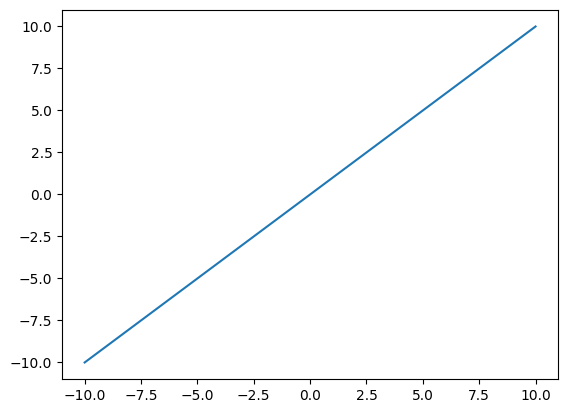

In [76]:
# plotting a 2D plot
# x = y

import matplotlib.pyplot as plt
x = np.linspace(-10,10,100)
y = x
plt.plot(x,y)

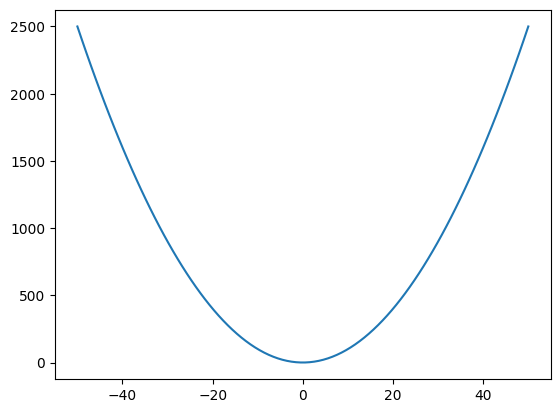

In [79]:
# y = x^2 => parabola

x = np.linspace(-50,50,100)
y = x**2
plt.plot(x,y)

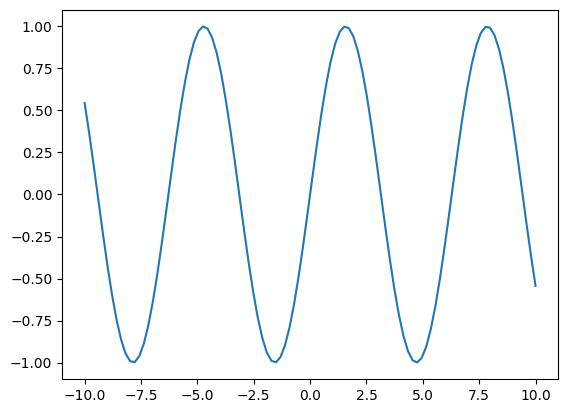

In [81]:
# y = sin(x) => parabola

x = np.linspace(-10,10,100)
y = np.sin(x)
plt.plot(x,y)

C:\Users\Lappy\AppData\Local\Temp\ipykernel_9608\4188020455.py:4: RuntimeWarning: invalid value encountered in log
  y = x * np.log(x)


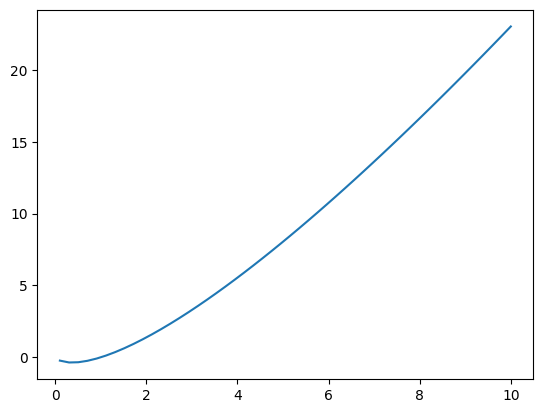

In [82]:
# y = x * log(x)

x = np.linspace(-10,10,100)
y = x * np.log(x)
plt.plot(x,y)

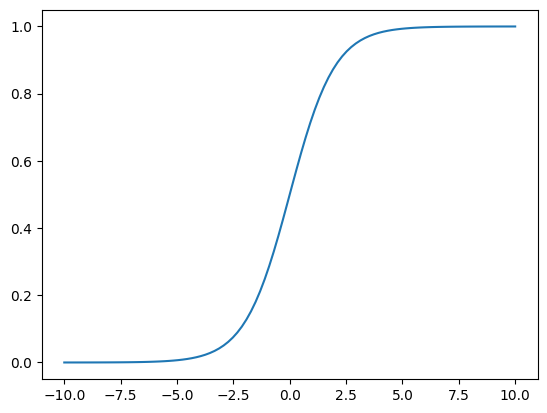

In [83]:
# plotting a sigmoid graph

x = np.linspace(-10,10,100)
y = 1/(1 + np.exp(-x))
plt.plot(x,y)

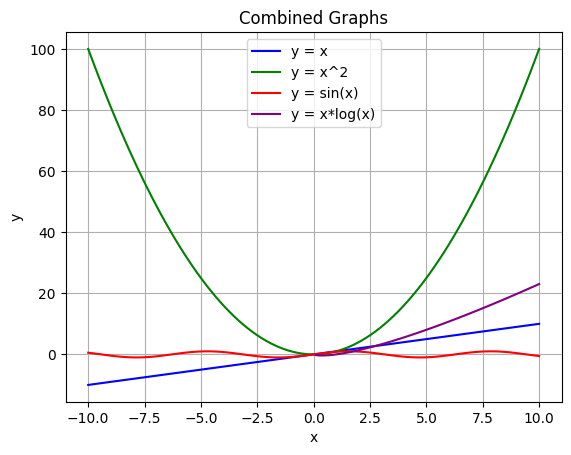

In [84]:
x = np.linspace(-10, 10, 100)
x_positive = np.linspace(0.1, 10, 100)

plt.plot(x, x, label='y = x', color='blue')
plt.plot(x, x**2, label='y = x^2', color='green')
plt.plot(x, np.sin(x), label='y = sin(x)', color='red')
plt.plot(x_positive, x_positive * np.log(x_positive), label='y = x*log(x)', color='purple')

plt.title('Combined Graphs')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

# **Plotting Graphs Using Matplotlib in NumPy**  

Matplotlib is the most widely used library for **visualizing data** in Python. It provides tools to create **line plots, scatter plots, histograms, and more.**  

In this guide, we will learn how to plot **various mathematical functions** using `matplotlib` and `numpy`.

---

## **1. Introduction to Matplotlib**
🔹 Matplotlib is a plotting library that works with **NumPy arrays**.  
🔹 The module `matplotlib.pyplot` provides a MATLAB-like interface for plotting.  
🔹 NumPy helps in generating numerical data required for plotting.  

### **Installing Matplotlib**
```bash
pip install matplotlib
```

### **Importing Matplotlib and NumPy**
```python
import numpy as np
import matplotlib.pyplot as plt
```

---

## **2. Plotting a Linear Function `y = x`**
📌 **Equation:**  
\[
y = x
\]
🔹 This is a simple **linear** function with a **45-degree diagonal line** passing through the origin.

### **Code:**
```python
x = np.linspace(-10, 10, 100)  # Generates 100 points from -10 to 10
y = x  # Linear function

plt.plot(x, y, label="y = x", color='blue')  # Plot line
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Linear Function y = x")
plt.legend()
plt.grid(True)
plt.show()
```

---

## **3. Plotting a Quadratic Function `y = x^2`**
📌 **Equation:**  
\[
y = x^2
\]
🔹 This creates a **parabola** that opens **upward**.

### **Code:**
```python
x = np.linspace(-10, 10, 100)
y = x**2  # Quadratic function

plt.plot(x, y, label="y = x^2", color='red')
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Quadratic Function y = x^2")
plt.legend()
plt.grid(True)
plt.show()
```

---

## **4. Plotting a Sine Function `y = sin(x)`**
📌 **Equation:**  
\[
y = \sin(x)
\]
🔹 This is a **periodic wave** with an amplitude of **1**.

### **Code:**
```python
x = np.linspace(-2*np.pi, 2*np.pi, 100)  # Covers -2π to 2π
y = np.sin(x)

plt.plot(x, y, label="y = sin(x)", color='green')
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Sine Function y = sin(x)")
plt.legend()
plt.grid(True)
plt.show()
```

---

## **5. Plotting `y = x * log(x)`**
📌 **Equation:**  
\[
y = x \log(x)
\]
🔹 This function is **undefined for x ≤ 0**, so we only consider **x > 0**.

### **Code:**
```python
x = np.linspace(0.1, 10, 100)  # Avoid 0 to prevent log(0) error
y = x * np.log(x)

plt.plot(x, y, label="y = x * log(x)", color='purple')
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Function y = x * log(x)")
plt.legend()
plt.grid(True)
plt.show()
```

---

## **6. Plotting a Sigmoid Function**
📌 **Equation:**  
\[
y = \frac{1}{1 + e^{-x}}
\]
🔹 This function is **S-shaped**, commonly used in **machine learning and neural networks**.

### **Code:**
```python
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.linspace(-10, 10, 100)
y = sigmoid(x)

plt.plot(x, y, label="Sigmoid Function", color='orange')
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Sigmoid Function")
plt.legend()
plt.grid(True)
plt.show()
```

---

## **7. Enhancing Graphs**
✅ **Adding Titles & Labels:** `plt.title()`, `plt.xlabel()`, `plt.ylabel()`  
✅ **Adding Legends:** `plt.legend()`  
✅ **Adding Grid:** `plt.grid(True)`  
✅ **Changing Line Styles:** `plt.plot(x, y, linestyle='--', marker='o')`  
✅ **Using Subplots:**  
```python
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
plt.plot(x, y)
```

---

## **Final Summary**
| **Function** | **Graph Shape** |
|-------------|---------------|
| `y = x` | Diagonal Line |
| `y = x^2` | Parabola |
| `y = sin(x)` | Wave |
| `y = x * log(x)` | Logarithmic Growth |
| `y = 1 / (1 + e^-x)` | Sigmoid Curve |

🚀 **Now you can plot any mathematical function using NumPy and Matplotlib!** 🎨📊

# Plotting Mathematical Functions using Matplotlib and NumPy: A Comprehensive Guide

**Table of Contents**

1. [Introduction](#introduction)
2. [Setting Up the Environment](#setting-up-the-environment)
3. [Basic Plotting with Matplotlib](#basic-plotting-with-matplotlib)
4. [Plotting Linear Function \( y = x \)](#plotting-linear-function--y--x-)
5. [Plotting Quadratic Function \( y = x^2 \)](#plotting-quadratic-function--y--x2-)
6. [Plotting Sine Function \( y = \sin(x) \)](#plotting-sine-function--y--sinx-)
7. [Plotting Logarithmic Function \( y = x \log(x) \)](#plotting-logarithmic-function--y--x-logx-)
8. [Plotting the Sigmoid Function](#plotting-the-sigmoid-function)
9. [Enhancing Plots](#enhancing-plots)
10. [Additional Topics](#additional-topics)
11. [Conclusion](#conclusion)
12. [Further Reading and References](#further-reading-and-references)

---

## Introduction

Plotting mathematical functions is fundamental in data visualization and analysis. Python, combined with libraries like NumPy and Matplotlib, provides a powerful environment for plotting a wide range of functions easily and efficiently. This guide will cover how to plot common mathematical functions, including linear, quadratic, trigonometric, logarithmic, and sigmoid functions, using Matplotlib and NumPy.

By the end of this guide, you will have learned:

- How to set up your Python environment for plotting.
- The basics of plotting with Matplotlib.
- How to plot specific mathematical functions.
- How to enhance and customize your plots.

---

## Setting Up the Environment

Before diving into plotting, you need to ensure that you have the necessary libraries installed.

### Installing NumPy and Matplotlib

If you haven't installed NumPy and Matplotlib yet, you can do so using `pip`:

```bash
pip install numpy matplotlib
```

Alternatively, if you're using Anaconda, these packages are included by default.

### Importing Libraries

In your Python script or Jupyter Notebook, import the required libraries:

```python
import numpy as np
import matplotlib.pyplot as plt
```

- **NumPy**: Used for numerical operations and handling arrays.
- **Matplotlib.pyplot**: Provides a MATLAB-like plotting framework.

---

## Basic Plotting with Matplotlib

Matplotlib uses an object-oriented approach to plotting. Here’s a basic example:

```python
import numpy as np
import matplotlib.pyplot as plt

# Create data
x = np.linspace(0, 10, 100)
y = x

# Create plot
plt.plot(x, y)

# Show plot
plt.show()
```

### Explanation

- **Creating Data**: `np.linspace(start, stop, num)` generates `num` evenly spaced samples from `start` to `stop`.
- **Plotting**: `plt.plot(x, y)` creates a 2D line plot of `y` versus `x`.
- **Displaying**: `plt.show()` displays the plot.

---

## Plotting Linear Function \( y = x \)

### Definition

The function \( y = x \) is a linear function representing a straight line with a slope of 1.

### Plotting Steps

1. **Generate Data Points**: Create an array of `x` values.
2. **Compute `y` Values**: Since \( y = x \), `y` is the same as `x`.
3. **Plot the Function**: Use `plt.plot()`.
4. **Label Axes and Title**: Add labels and a title to the plot.
5. **Display the Plot**: Use `plt.show()`.

### Code Example

```python
import numpy as np
import matplotlib.pyplot as plt

# Generate x values
x = np.linspace(-10, 10, 400)

# Compute y values
y = x

# Create the plot
plt.plot(x, y, label='y = x')

# Add labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = x')
plt.legend()

# Show grid
plt.grid(True)

# Display the plot
plt.show()
```

### Explanation

- **`np.linspace(-10, 10, 400)`**: Generates 400 points between -10 and 10.
- **`label='y = x'`**: Adds a label to the plotted line for the legend.
- **`plt.legend()`**: Displays the legend.

![Plot of y = x](attachment:y_equals_x.png)

---

## Plotting Quadratic Function \( y = x^2 \)

### Definition

The function \( y = x^2 \) is a quadratic function representing a parabola opening upwards.

### Plotting Steps

1. **Generate `x` Values**: Use `np.linspace()` over an appropriate range.
2. **Compute `y` Values**: Calculate `y = x ** 2`.
3. **Plot the Function**.
4. **Enhance the Plot**.

### Code Example

```python
import numpy as np
import matplotlib.pyplot as plt

# Generate x values
x = np.linspace(-10, 10, 400)

# Compute y values
y = x ** 2

# Create the plot
plt.plot(x, y, color='red', label='y = x^2')

# Add labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = x^2')
plt.legend()

# Show grid
plt.grid(True)

# Display the plot
plt.show()
```

### Explanation

- **`x ** 2`**: Squares each element in `x`.
- **`color='red'`**: Sets the line color to red.

![Plot of y = x^2](attachment:y_equals_x_squared.png)

---

## Plotting Sine Function \( y = \sin(x) \)

### Definition

The function \( y = \sin(x) \) is a periodic function with a period of \( 2\pi \).

### Plotting Steps

1. **Generate `x` Values**: Use `np.linspace()` over several periods.
2. **Compute `y` Values**: Use `np.sin(x)`.
3. **Plot the Function**.
4. **Customize the Plot**.

### Code Example

```python
import numpy as np
import matplotlib.pyplot as plt

# Generate x values
x = np.linspace(-2 * np.pi, 2 * np.pi, 400)

# Compute y values
y = np.sin(x)

# Create the plot
plt.plot(x, y, label='y = sin(x)')

# Add labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = sin(x)')
plt.legend()

# Set x-ticks to multiples of pi
plt.xticks(
    ticks=np.arange(-2 * np.pi, 2.5 * np.pi, np.pi / 2),
    labels=[
        r'$-2\pi$', r'$-\frac{3\pi}{2}$', r'$-\pi$', r'$-\frac{\pi}{2}$', '0',
        r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3\pi}{2}$', r'$2\pi$'
    ]
)

# Show grid
plt.grid(True)

# Display the plot
plt.show()
```

### Explanation

- **`np.sin(x)`**: Computes the sine of each element in `x`.
- **Formatting x-ticks**: Uses LaTeX-style formatting for π symbols.

![Plot of y = sin(x)](attachment:y_equals_sin_x.png)

---

## Plotting Logarithmic Function \( y = x \log(x) \)

### Definition

The function \( y = x \log(x) \) combines linear and logarithmic functions. Note that \( y \) is undefined for \( x \leq 0 \).

### Plotting Steps

1. **Generate `x` Values**: Start from a small positive number to avoid \( x = 0 \).
2. **Compute `y` Values**: Use `x * np.log(x)`.
3. **Handle Potential Errors**: Ensure no invalid computations occur.
4. **Plot the Function**.

### Code Example

```python
import numpy as np
import matplotlib.pyplot as plt

# Generate x values greater than 0
x = np.linspace(0.01, 10, 400)

# Compute y values
y = x * np.log(x)

# Create the plot
plt.plot(x, y, label='y = x * log(x)')

# Add labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = x * log(x)')
plt.legend()

# Show grid
plt.grid(True)

# Display the plot
plt.show()
```

### Explanation

- **Avoiding \( x = 0 \)**: Start `x` from a small positive value like `0.01` to prevent logarithm of zero.
- **`np.log(x)`**: Computes the natural logarithm (base \( e \)).

![Plot of y = x * log(x)](attachment:y_equals_x_log_x.png)

---

## Plotting the Sigmoid Function

### Definition

The sigmoid function is defined as:

\[
\sigma(x) = \frac{1}{1 + e^{-x}}
\]

It produces an "S"-shaped curve, mapping any real-valued number into a value between 0 and 1.

### Plotting Steps

1. **Define the Sigmoid Function**.
2. **Generate `x` Values**: Choose a range that captures the curve's behavior.
3. **Compute `y` Values**: Apply the sigmoid function to `x`.
4. **Plot the Function**.

### Code Example

```python
import numpy as np
import matplotlib.pyplot as plt

# Define the sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Generate x values
x = np.linspace(-10, 10, 400)

# Compute y values
y = sigmoid(x)

# Create the plot
plt.plot(x, y, label='Sigmoid Function')

# Add labels and title
plt.xlabel('x')
plt.ylabel('σ(x)')
plt.title('Plot of the Sigmoid Function')

# Add horizontal lines at y=0 and y=1
plt.axhline(0, color='black', linewidth=0.5)
plt.axhline(1, color='black', linewidth=0.5)

# Add vertical line at x=0
plt.axvline(0, color='black', linewidth=0.5)

# Show grid
plt.grid(True)

# Display the plot
plt.show()
```

### Explanation

- **Defining the Sigmoid Function**: A custom function `sigmoid(x)` is created.
- **Plot Annotations**: Added horizontal and vertical lines to highlight key points.

![Plot of the Sigmoid Function](attachment:sigmoid_function.png)

---

## Enhancing Plots

To make your plots more informative and visually appealing, consider the following enhancements:

### Adding Annotations

```python
# Example: Annotate the point where x = 0
plt.annotate(
    'Center Point',
    xy=(0, sigmoid(0)),
    xytext=(-5, 0.8),
    arrowprops=dict(facecolor='black', shrink=0.05)
)
```

### Changing Styles

- Use different line styles (`'-'`, `'--'`, `'-.'`, `':'`).
- Change line width with `linewidth` parameter.
- Adjust marker styles with `marker` parameter.

```python
plt.plot(x, y, linestyle='--', linewidth=2, color='purple', label='Sigmoid')
```

### Adding Subplots

```python
fig, axs = plt.subplots(2, 1, figsize=(8, 10))

# First subplot
axs[0].plot(x, y1)
axs[0].set_title('First Function')

# Second subplot
axs[1].plot(x, y2)
axs[1].set_title('Second Function')

plt.tight_layout()
plt.show()
```

### Saving Plots

```python
plt.savefig('sigmoid_function.png', dpi=300)
```

- **`dpi`**: Controls the resolution of the saved image.
- The file format is inferred from the file extension.

---

## Additional Topics

### Plotting Multiple Functions on the Same Axes

```python
plt.plot(x, y1, label='Function 1')
plt.plot(x, y2, label='Function 2')
plt.legend()
```

### Plotting Functions with Discontinuities

- Handle undefined points by using masking or setting `y` values to `np.nan`.

### Using Logarithmic Scales

```python
plt.semilogy(x, y)
plt.semilogx(x, y)
plt.loglog(x, y)
```

### Interactive Plots

- Use `%matplotlib inline` or `%matplotlib notebook` in Jupyter Notebooks.
- Alternatively, use `matplotlib.widgets` for interactivity.

---

## Conclusion

Plotting mathematical functions using Matplotlib and NumPy is a straightforward process that can be customized extensively. By understanding the basics of plotting and how to manipulate your data, you can create insightful visualizations for analysis, presentations, or educational purposes.

Key takeaways:

- Use NumPy for efficient numerical computations.
- Utilize Matplotlib for a wide range of plotting capabilities.
- Customize your plots to enhance readability and appearance.

---

## Further Reading and References

- **Matplotlib Documentation**: [https://matplotlib.org/stable/contents.html](https://matplotlib.org/stable/contents.html)
- **NumPy Documentation**: [https://numpy.org/doc/](https://numpy.org/doc/)
- **Python Matplotlib Tutorial**: [https://www.tutorialspoint.com/matplotlib/index.htm](https://www.tutorialspoint.com/matplotlib/index.htm)
- **Matplotlib Plotting Styles and Colors**: [https://matplotlib.org/stable/gallery/color/named_colors.html](https://matplotlib.org/stable/gallery/color/named_colors.html)
- **List of Mathematical Symbols and Commands in LaTeX**: [https://www.caam.rice.edu/~heinken/latex/symbols.pdf](https://www.caam.rice.edu/~heinken/latex/symbols.pdf)

---

**Happy Plotting!**